# Homework 2 - association rules

In this homework we will perform association between data series in the obesity dataset.

## Conclusions

TBD, need to update.

## Dependencies

### General dependencies

Imports for Python

In [ ]:
import typing as t
import csv
import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt
import arulespy.arules as arules
import arulespy.arulesViz as arulesviz


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Dataset-specific dependencies

Dataset manager, known labels, known outputs for the dataset.

In [ ]:
NUMERICAL_VARIABLES = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
CATEGORICAL_VARIABLES = [
    "FAVC",
    "CAEC",
    "CALC",
    "SCC",
    "MTRANS",
    "Gender",
    "family_history_with_overweight",
    "SMOKE",
    "NObeyesdad",
]
CATEGORICAL_VARIABLES_NO_LABEL = [
    "FAVC",
    "CAEC",
    "CALC",
    "SCC",
    "MTRANS",
    "Gender",
    "family_history_with_overweight",
    "SMOKE",
]
LABEL_VARIABLE = "NObeyesdad"
LABEL_DICTIONARY = {
    "Age": "Age",
    "Height": "Height (cm)",
    "Weight": "Weight (kg)",
    "FCVC": " Frequency of consumption of vegetables (times per day)",
    "NCP": "Number of main meals",
    "CH2O": "Consumption of water daily (Liters)",
    "FAF": "Physical activity frequency (times per day)",
    "TUE": "Time using technology devices (hours)",
    "FAVC": "Frequent consumption of high caloric food",
    "CAEC": "Consumption of food between meals",
    "CALC": "Consumption of alcohol",
    "SCC": "Calories consumption monitoring",
    "MTRANS": "Transportation used",
    "Gender": "Gender",
    "family_history_with_overweight": "Family member suffered or suffers from overweight",
    "SMOKE": "Smoker or not",
    "NObeyesdad": "Obesity level"
}

T = t.TypeVar("T")


class Person:
    Gender: str
    Age: int
    Height: float
    Weight: float
    family_history_with_overweight: str
    FAVC: str
    FCVC: int
    NCP: int
    CAEC: str
    SMOKE: str
    CH2O: int
    SCC: str
    FAF: str
    TUE: int
    CALC: str
    MTRANS: str
    NObeyesdad: str

    def __init__(
        self,
        Gender: str,
        Age: int,
        Height: float,
        Weight: float,
        family_history_with_overweight: str,
        FAVC: str,
        FCVC: int,
        NCP: int,
        CAEC: str,
        SMOKE: str,
        CH2O: int,
        SCC: str,
        FAF: int,
        TUE: int,
        CALC: str,
        MTRANS: str,
        NObeyesdad: str,
    ):
        self.Gender = Gender
        self.Age = Age
        self.Height = Height
        self.Weight = Weight
        self.family_history_with_overweight = family_history_with_overweight
        self.FAVC = FAVC
        self.FCVC = FCVC
        self.NCP = NCP
        self.CAEC = CAEC
        self.SMOKE = SMOKE
        self.CH2O = CH2O
        self.SCC = SCC
        self.FAF = FAF
        self.TUE = TUE
        self.CALC = CALC
        self.MTRANS = MTRANS
        self.NObeyesdad = NObeyesdad

    def __str__(self):
        return (
            "{"
            + f'"Gender": "{self.Gender}",'
            + f'"Age": {self.Age},'
            + f'"Height": {self.Height},'
            + f'"Weight": {self.Weight},'
            + f'"family_history_with_overweight": "{self.family_history_with_overweight}",'
            + f'"FAVC": "{self.FAVC}",'
            + f'"FCVC": {self.FCVC},'
            + f'"NCP": {self.NCP},'
            + f'"CAEC": "{self.CAEC}",'
            + f'"SMOKE": "{self.SMOKE}",'
            + f'"CH2O": {self.CH2O},'
            + f'"SCC": {self.SCC},'
            + f'"FAF": "{self.FAF}",'
            + f'"TUE": {self.TUE},'
            + f'"CALC": "{self.CALC}",'
            + f'"MTRANS": "{self.MTRANS}",'
            + f'"NObeyesdad": "{self.NObeyesdad}"'
            + "}"
        )

    def __len__(self):
        return 17

    __repr__ = __str__


class DatasetManager:
    def __init__(self, path_to_csv: str):
        self.path_to_csv = path_to_csv

    def load_as_obj_list(self) -> list[Person]:
        with open(self.path_to_csv) as csv_file:
            csv_reader = csv.DictReader(csv_file)
            return [Person(**row) for row in csv_reader]

    def obj_list_to_list(
        self, data: t.List[Person], attrs_list: t.List[str] = CATEGORICAL_VARIABLES
    ) -> t.List[t.List[str]]:
        return [[getattr(entry, field) for entry in data] for field in attrs_list]

    def to_number(self, data: t.List[str]) -> npt.NDArray[np.float32]:
        return np.array([np.float32(entry) for entry in data])

    def flatten(self, data: t.List[t.List[T]]) -> t.List[T]:
        return [entry for series in data for entry in series]

In [ ]:
dataset_manager = DatasetManager("data/ObesityDataSet.csv")
dataset_obj_list = dataset_manager.load_as_obj_list()

### Categorial data utility functions

Here we add utility functions (if any) for the categorial data types.

In [ ]:
# TODO: add if any are found

### Continuous data utility functions

Here we add utility functions (if any) for the continuous data types.

In [ ]:
def bin_by_frequency(data: npt.NDArray[np.float32], bins: int = 30):
    result = pd.qcut(data, q=bins, duplicates='drop')
    return result

## Preliminary data analysis

Here we built plots for the data. Mostly for debugging purposes.

In [ ]:
for label in CATEGORICAL_VARIABLES_NO_LABEL:
    pretty_label = LABEL_DICTIONARY[label]
    data = dataset_manager.obj_list_to_list(data=dataset_obj_list, attrs_list=[label])
    flat_data = dataset_manager.flatten(data=data)

    plt.figure()
    plt.hist(flat_data)
    plt.xlabel(pretty_label)
    plt.ylabel("Count")
    plt.show()

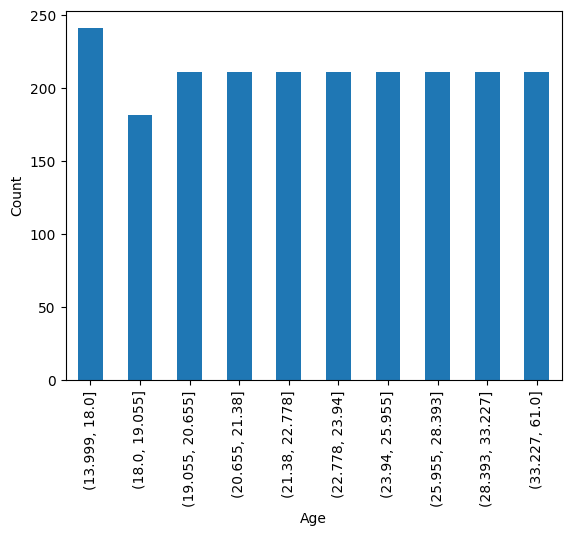

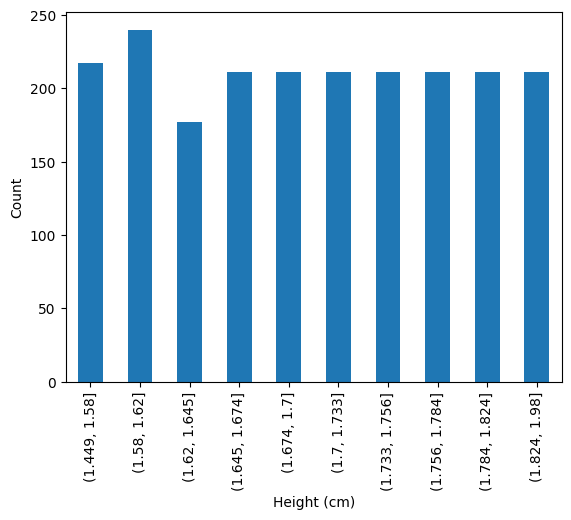

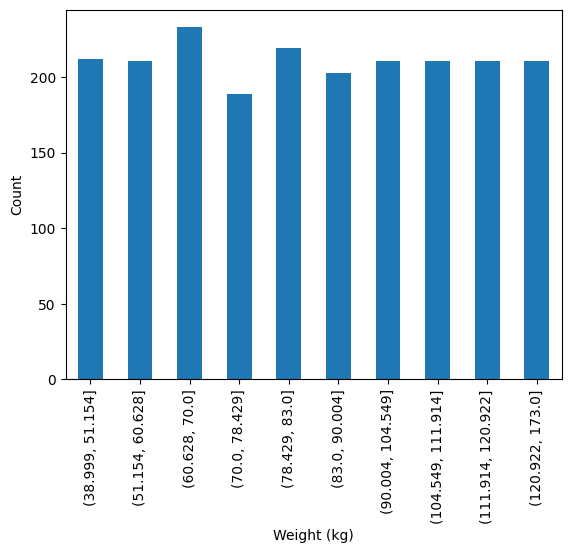

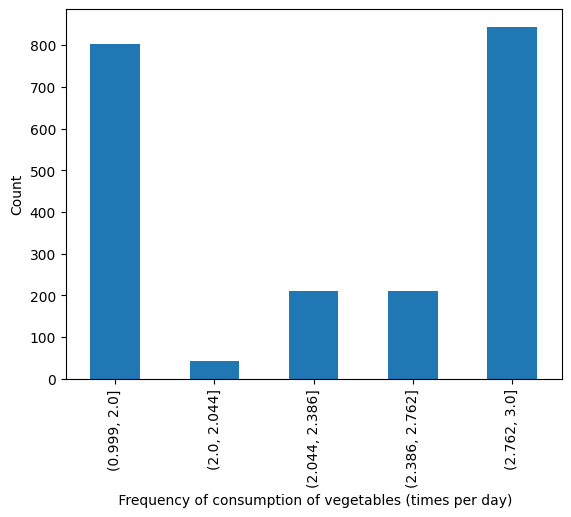

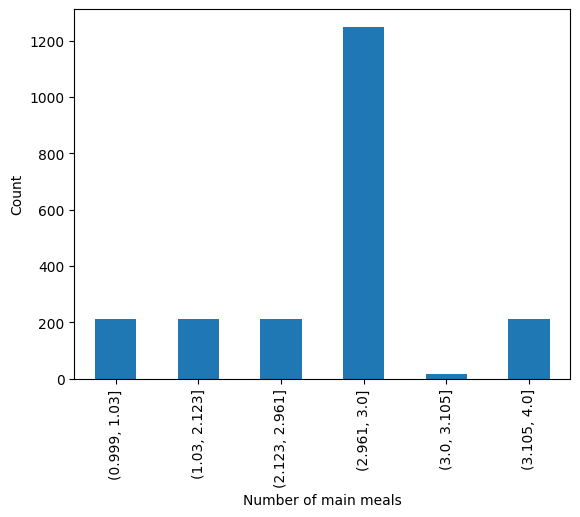

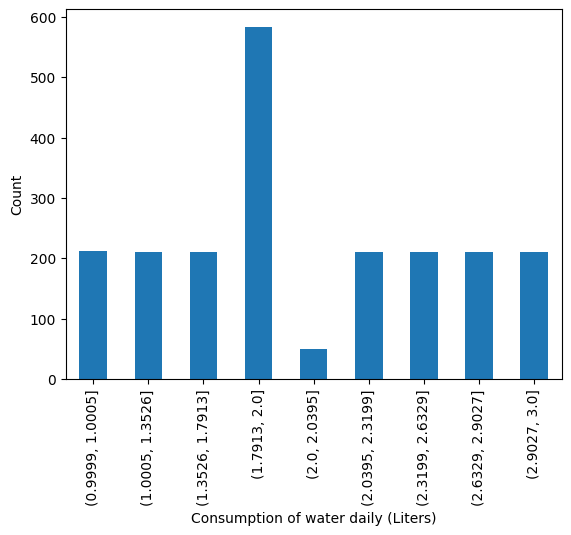

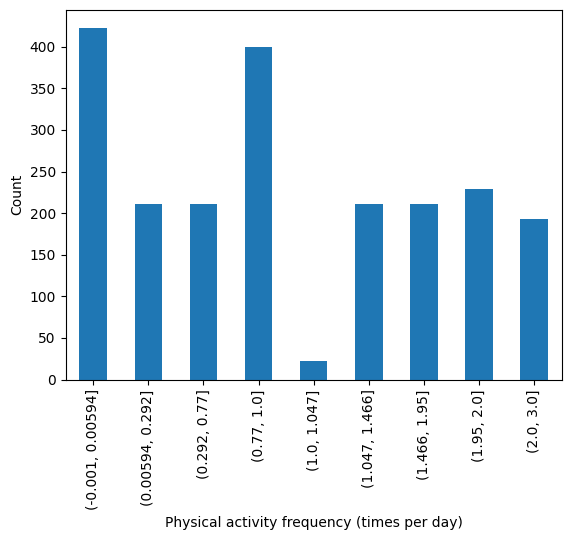

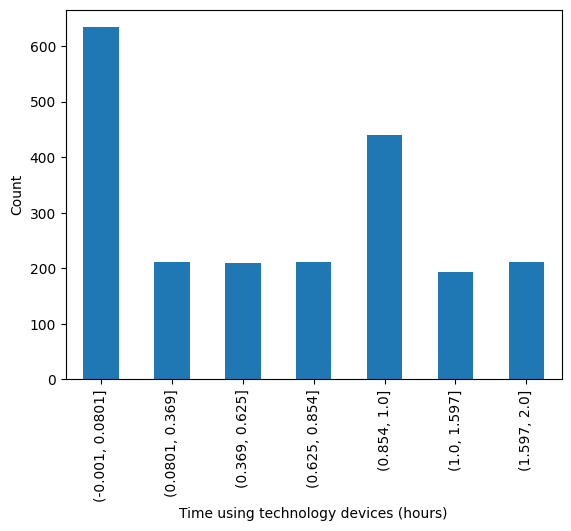

In [150]:
for label in NUMERICAL_VARIABLES:
    pretty_label = LABEL_DICTIONARY[label]
    data = dataset_manager.obj_list_to_list(data=dataset_obj_list, attrs_list=[label])
    flat_data = dataset_manager.flatten(data=data)
    numeric_data = dataset_manager.to_number(data=flat_data)
    binned_data = bin_by_frequency(data=numeric_data, bins=10)

    plt.figure()
    binned_data.value_counts().plot(kind='bar', xlabel=label, ylabel='Count', rot=90)
    plt.xlabel(pretty_label)
    plt.ylabel("Count")
    plt.show()

## Finding associations

Here we use the Associator class to get the associations.